In [1]:
## Analise Exploratoria

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinal.csv'
df_final = pd.read_csv(path_final, sep=';', encoding='utf-8')
df_final.head(1)

,RowId,Id_do_imovel,Url_da_Pagina_do_imovel,Url_do_Imovel,Nome_do_imovel,Preco,Tipo_de_Imovel,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,...,Percentual_Crimes,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distância_dirigindo_de_Lisboa_Portugal,Distância_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional
0,0,30365582,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/30365582/,"Apartamento T0 na rua Manuel Lopes Conde, 1, O...","400,0",T0,"50,0","0,0",sem elevador,...,"29,0",39,"40,640496","-8,6537841","Aveiro, Portugal","218,6","56,6","18,0","31,0","4,0"


In [4]:
# Variaveis Numericas
lista_variaveis_numericas = ['Valor_Area_util_do_imovel','Numero_Andar_do_imovel','Quantidade_de_Quartos',
'Numero_de_Banheiros','Area_construida','Numero_de_Quartos','Numero_de_fotos_do_anuncio','Numero_de_videos_do_anuncio']

In [5]:
# convertendo todos valores para inteiro
def convert_float_to_int(dataframe, column):
    if dataframe[column].dtypes != 'int64':
        dataframe[column] = dataframe[column].str.replace(',', '.').astype(float)
        dataframe[column] = dataframe[column].astype(int)

for column in lista_variaveis_numericas:
    convert_float_to_int(df_final,column)

df_final['Preco_do_Imovel'] = df_final['Preco_do_Imovel'].str.replace(',', '.').astype(float)
df_final['Preco_por_metro_quadrado']= df_final['Preco_por_metro_quadrado'].str.replace(',', '.').astype(float)  

In [6]:
# funão para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

____
Valor_Area_util_do_imovel: 204
____
Quantidade_de_Quartos: 16
____
Numero_de_Banheiros: 98
____
Area_construida: 207
____
Numero_de_Quartos: 15


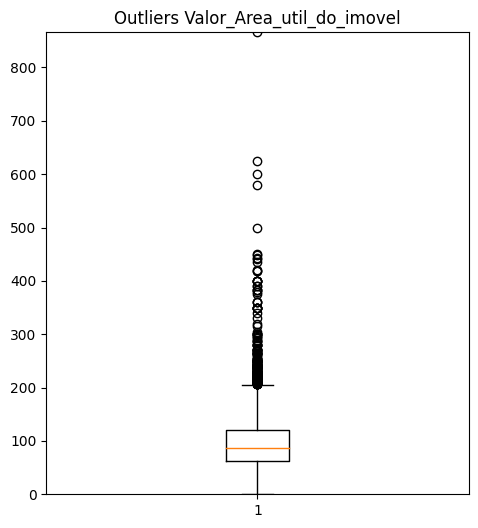

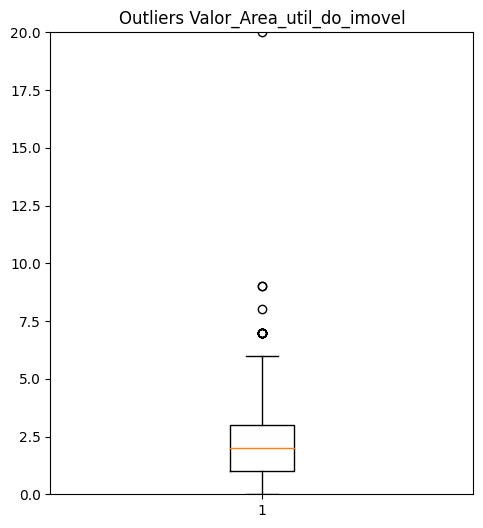

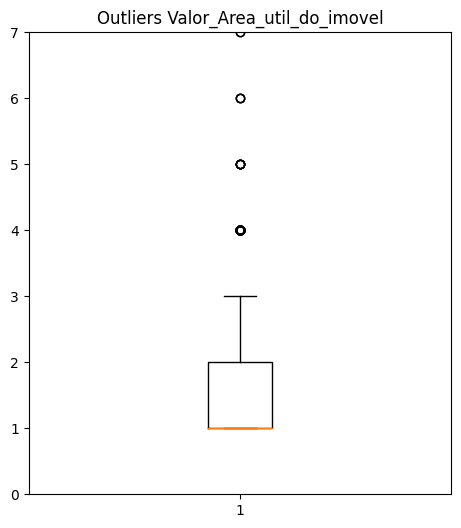

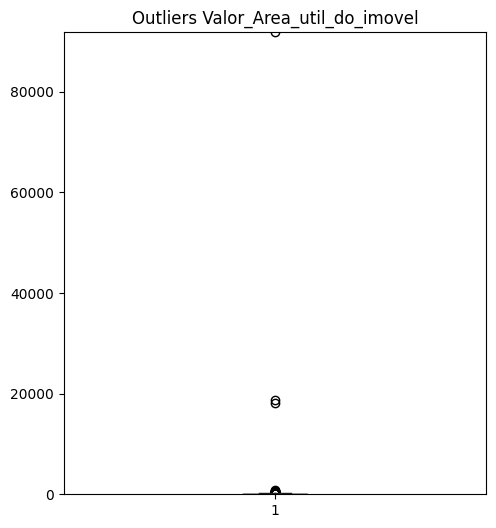

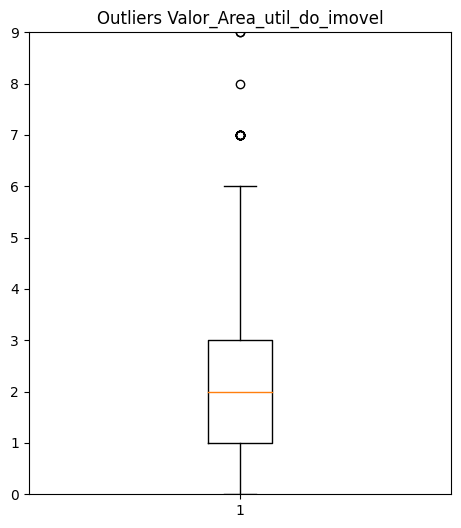

In [7]:
todos_outliers = pd.DataFrame()
lista_numerica = ['Valor_Area_util_do_imovel','Quantidade_de_Quartos',
'Numero_de_Banheiros','Area_construida','Numero_de_Quartos']
for variavel_numerica in lista_numerica:
    outliers = detect_outliers(df_final, variavel_numerica)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot(df_final[variavel_numerica])
    plt.title('Outliers Valor_Area_util_do_imovel')
    max = df_final[variavel_numerica].max()
    plt.ylim([0, max])

    print(f'____')
    print(f'{variavel_numerica}: ' + str(outliers.shape[0]))
    todos_outliers = pd.concat([todos_outliers,outliers])

    



                         

In [9]:
# Removendo duplicatas
todos_outliers = todos_outliers.drop_duplicates()

# Contando o número total de outliers
num_total_outliers = todos_outliers.shape[0]
num_total_records = df_final.shape[0]
percent_outliers = num_total_outliers/num_total_records
# Calculando a porcentagem de outliers
print('___________________________________')
print(f"Total de outliers: {num_total_outliers}")
print(f"Total Registros da base: {num_total_records}")
print(f"Percentual de outliers: {percent_outliers}%")

___________________________________
Total de outliers: 264
Total Registros da base: 7278
Percentual de outliers: 0.036273701566364384%


In [10]:
print('QTD Registros antes: ' + str(df_final.shape[0]))
# Removendo os outliers do DataFrame original
df_final = df_final.drop(todos_outliers.index)
print('QTD Registros Depois: ' + str(df_final.shape[0]))

QTD Registros antes: 7278
QTD Registros Depois: 7014


In [11]:
# Variaveis Binarias
# algumas colunas do data frame tem valores que não foram informados
# iremos preencher com -1 esses valores
def preencher_valores_ausentes(dataframe, lista):
    for coluna in lista:
        dataframe[coluna] = df_final[coluna].str.replace(',', '.').astype(float)
        df_final[coluna] = df_final[coluna].fillna(-1)
        df_final[coluna] = df_final[coluna].astype(int)
    return dataframe

colunas_a_preencher = ['Possui_Jardim','Possui_Elevador','Possui_Estacionamento','Possui_Piscina','Possui_Terraco','Indicador_Imovel_em_boas_condicoes',
                       'Indicador_Precisa_de_reforma','Indicador_Construcao_recente']

# Aplicando a função para preencher os valores ausentes com -1 nas colunas desejadas
df_final = preencher_valores_ausentes(df_final, colunas_a_preencher)

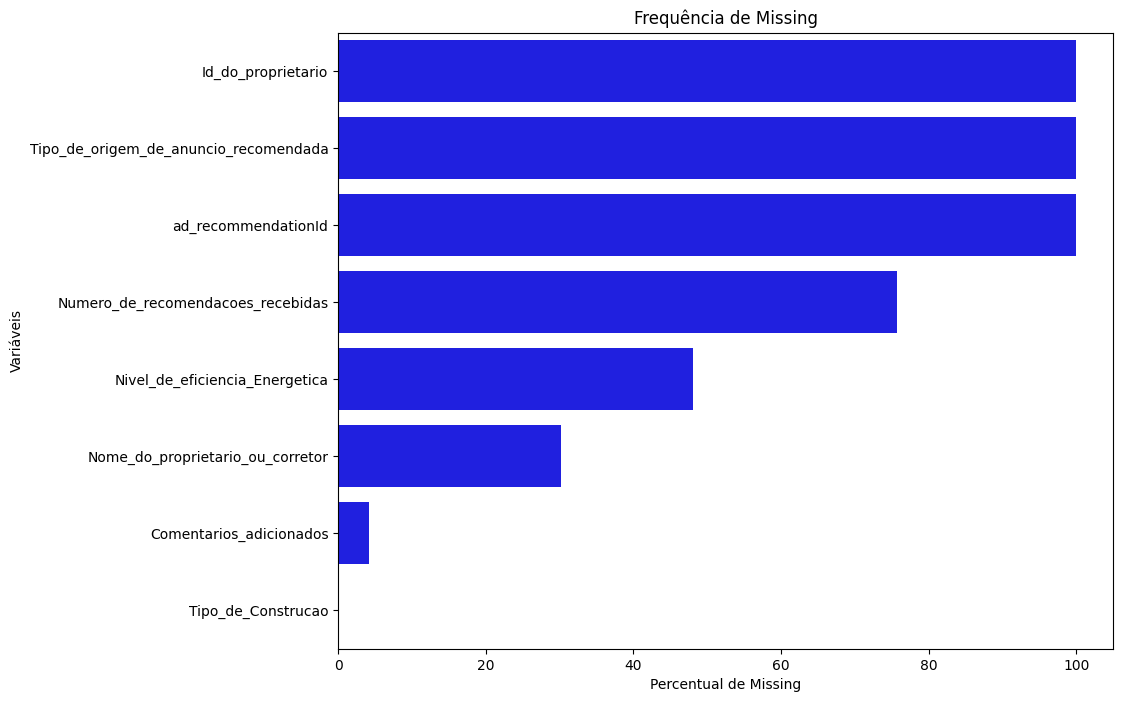

In [12]:
# Analise de Missing

missing_data = df_final.isnull().sum().sort_values(ascending=False)

missing_data_percent = (missing_data / len(df_final)) * 100

# Filtrando apenas as variáveis que têm dados ausentes
missing_data_percent = missing_data_percent[missing_data_percent > 0]

plt.figure(figsize=(10,8))
sns.barplot(x=missing_data_percent.values, y=missing_data_percent.index, color='blue')
plt.title('Frequência de Missing')
plt.xlabel('Percentual de Missing')
plt.ylabel('Variáveis')
plt.show()


In [13]:
# filtrando a série
filtered = missing_data_percent[missing_data_percent > 20]

# obtendo os índices como uma lista
columns_to_drop = filtered.index.tolist()

print(columns_to_drop)

['Id_do_proprietario', 'Tipo_de_origem_de_anuncio_recomendada', 'ad_recommendationId', 'Numero_de_recomendacoes_recebidas', 'Nivel_de_eficiencia_Energetica', 'Nome_do_proprietario_ou_corretor']


In [14]:
# Exclui as colunas do dataframe
df_final = df_final.drop(columns=columns_to_drop)

# Exlui colunas com informacoes repetidas
df_final = df_final.drop('Tipo_de_Imovel', axis=1)
df_final = df_final.drop('Url_da_Pagina_do_imovel', axis=1)
df_final = df_final.drop('Url_do_Imovel', axis=1)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical(df, column, plot_type='bar', show_percentage=False):
    """
    Função para plotar o gráfico de contagem de uma variável categórica.

    Args:
    df (pandas.DataFrame): DataFrame contendo os dados.
    column (str): Nome da coluna categórica a ser plotada.
    plot_type (str): Tipo de gráfico a ser gerado. Opções: 'bar' (barras) ou 'pie' (pizza).
    show_percentage (bool): Indica se o percentual deve ser mostrado acima das barras ou fatias.

    Returns:
    None
    """
    if plot_type == 'bar':
        # criação de uma figura com um subplot
        fig, ax = plt.subplots(figsize=(10, 5))

        # criação do gráfico de contagem usando seaborn
        sns.countplot(x=column, data=df, ax=ax)

        if show_percentage:
            # cálculo dos percentuais
            total = len(df[column])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

        # rotação dos rótulos do eixo x para melhor legibilidade
        for label in ax.get_xticklabels():
            label.set_rotation(45)

        # ajuste automático do layout do subplot
        plt.tight_layout()

    elif plot_type == 'pie':
        # criação de uma figura com um subplot
        fig, ax = plt.subplots(figsize=(10, 5))

        # agrupamento dos dados por categoria
        data_counts = df[column].value_counts()

        # criação do gráfico de pizza
        ax.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90)

        # aspecto igual para tornar a pizza circular
        ax.axis('equal')

        # título do gráfico
        ax.set_title(column)

    # exibir a figura com o gráfico
    plt.show()


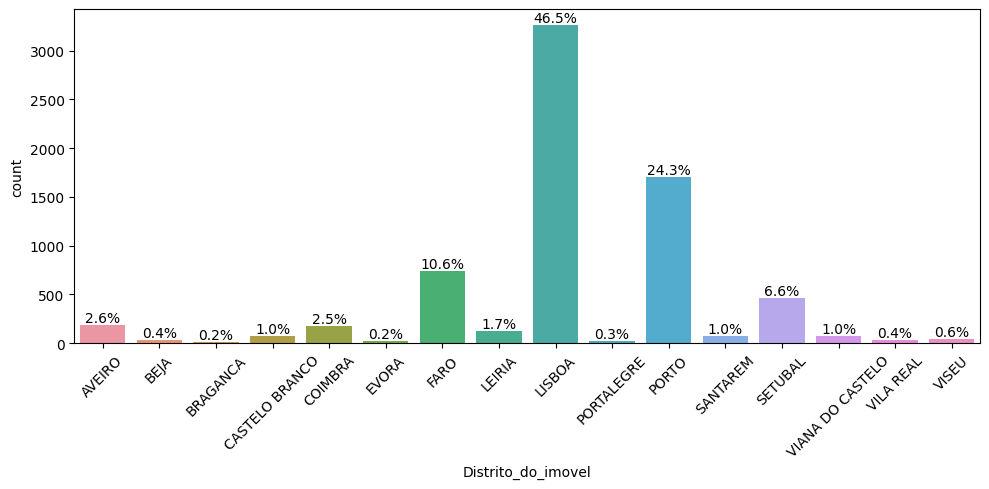

In [16]:
plot_categorical(df_final,'Distrito_do_imovel',show_percentage=True)

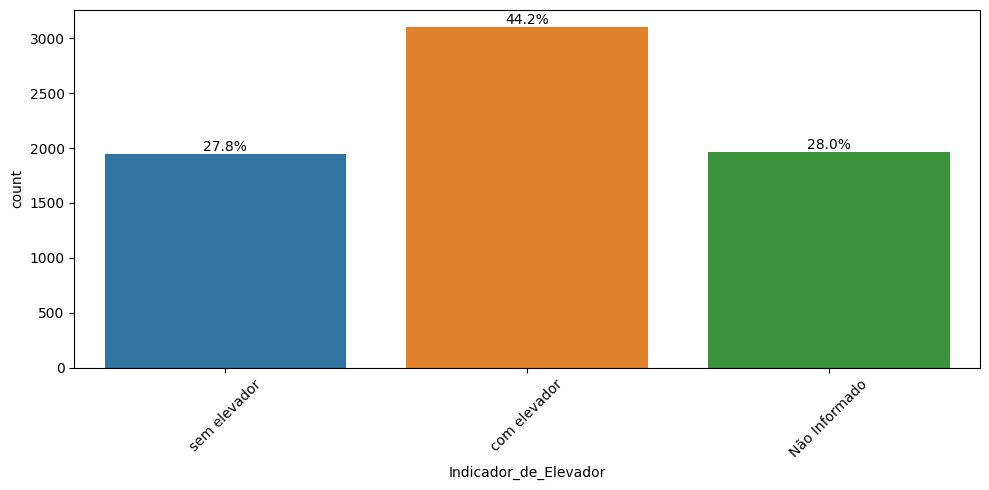

In [18]:
# ANALISE VARIAVEL INDICADOR ELEVADOR
df_final['Indicador_de_Elevador'] = df_final['Indicador_de_Elevador'].replace('0', 'Não Informado')
plot_categorical(df_final,'Indicador_de_Elevador',show_percentage=True)

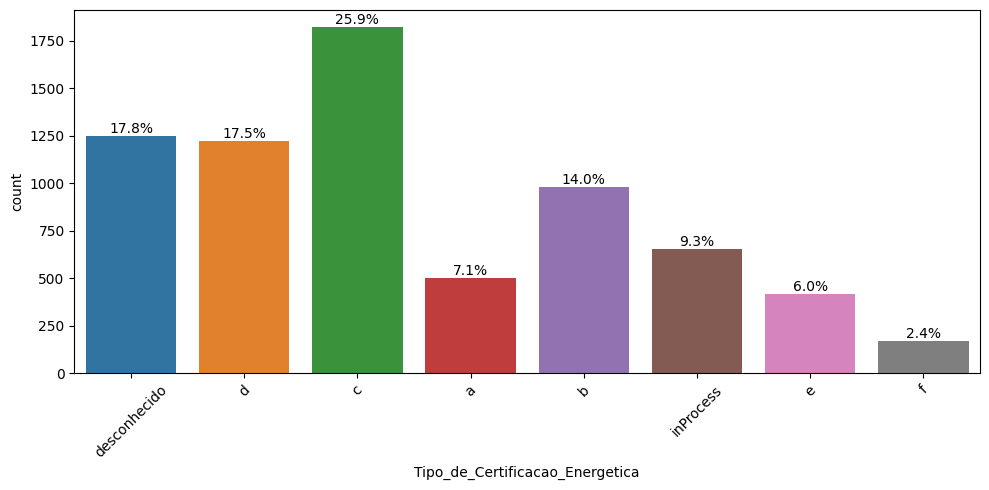

In [19]:
# ANALISE VARIAVEL CERTIFICACAO ENERGETICA
list_to_replace =['exempt','unknown']
df_final['Tipo_de_Certificacao_Energetica'] = df_final['Tipo_de_Certificacao_Energetica'].replace(list_to_replace, 'desconhecido')
df_final['Tipo_de_Certificacao_Energetica'] = df_final['Tipo_de_Certificacao_Energetica'].replace('aPlus', 'a')
df_final['Tipo_de_Certificacao_Energetica'] = df_final['Tipo_de_Certificacao_Energetica'].replace('g', 'f')

plot_categorical(df_final,'Tipo_de_Certificacao_Energetica',show_percentage=True)

In [20]:
# ANALISE TIPO DE CONSTRUCAO
df_final['Tipo_de_Construcao'] = df_final['Tipo_de_Construcao'].replace('1,0','Sobrado')
df_final['Tipo_de_Construcao'] = df_final['Tipo_de_Construcao'].replace('2,0','Casa')
df_final['Tipo_de_Construcao'] = df_final['Tipo_de_Construcao'].replace('3,0','Apartamento')
# agrupamento por 1 coluna
df_final.groupby('Tipo_de_Construcao').agg(qtd = ('RowId', 'count'))


,qtd
Tipo_de_Construcao,
Apartamento,6971
Casa,29
Sobrado,6


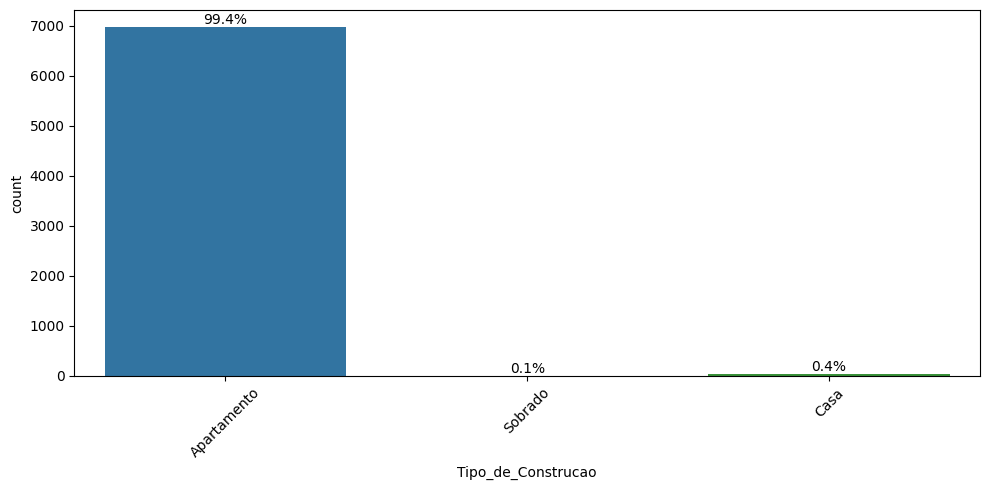

In [21]:
plot_categorical(df_final,'Tipo_de_Construcao',show_percentage=True)

In [22]:
# Exclui os 34 registros casa + sobrado
index_to_drop = df_final[(df_final['Tipo_de_Construcao'] == 'Sobrado') | (df_final['Tipo_de_Construcao'] == 'Casa')].index
df_final.drop(index_to_drop, inplace=True)

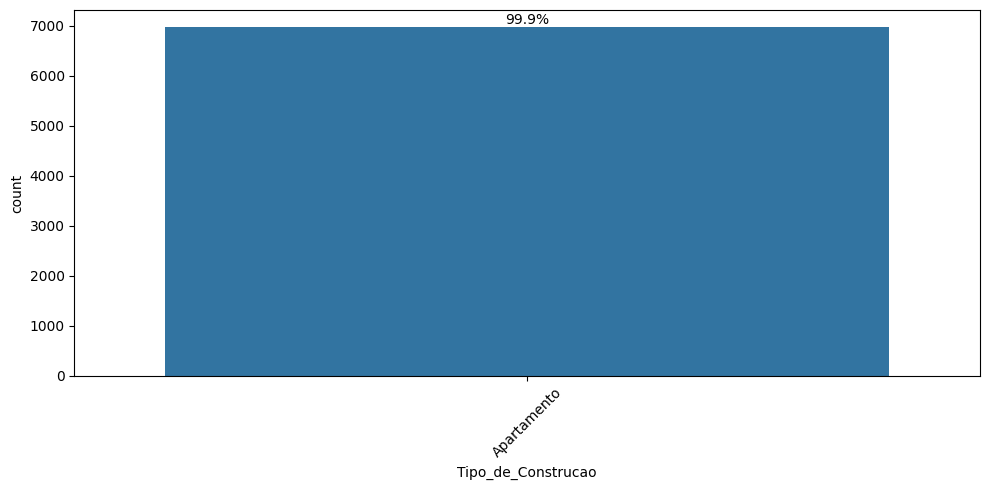

In [23]:
plot_categorical(df_final,'Tipo_de_Construcao',show_percentage=True)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_frequencia_binaria(dataframe, coluna):
    frequencia = dataframe[coluna].value_counts()

    # Plotar gráfico de barras
    barras = plt.bar(frequencia.index, frequencia.values)

    # Adicionar valores no topo de cada barra
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2, altura,
                 '%d' % int(altura), ha='center', va='bottom')

    # Configurar rótulos e título
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title('Frequência de Valores Únicos - ' + str(coluna).replace("_"," "))

    # Definir o intervalo do eixo x para exibir apenas os valores -1, 0 e 1
    plt.xticks(np.arange(-1, 2, 1))

    # Exibir o gráfico
    plt.show()

def contar_frequencia_binaria(dataframe, coluna):
    frequencia = dataframe[coluna].value_counts()
    return frequencia

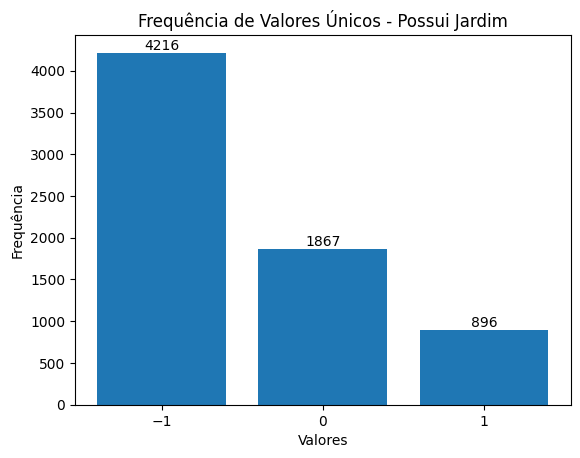

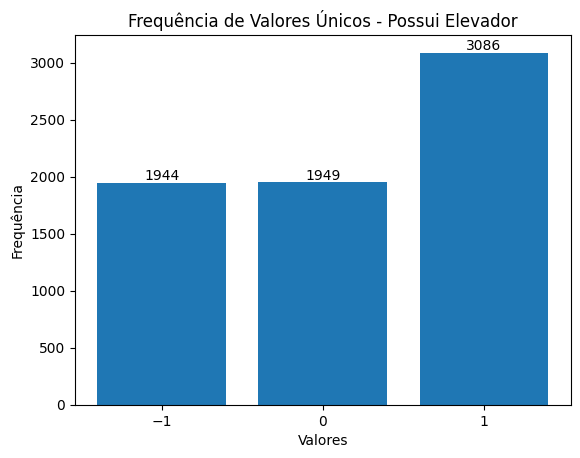

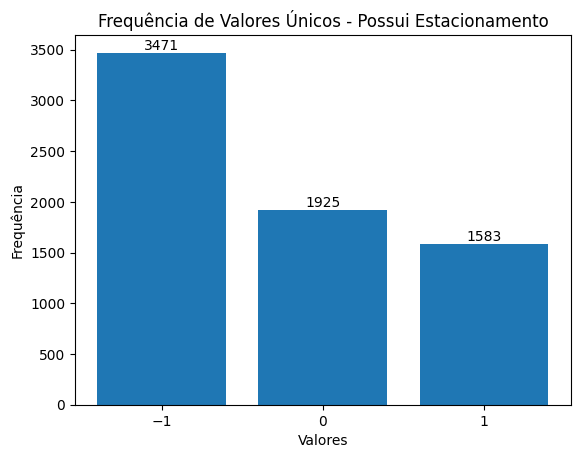

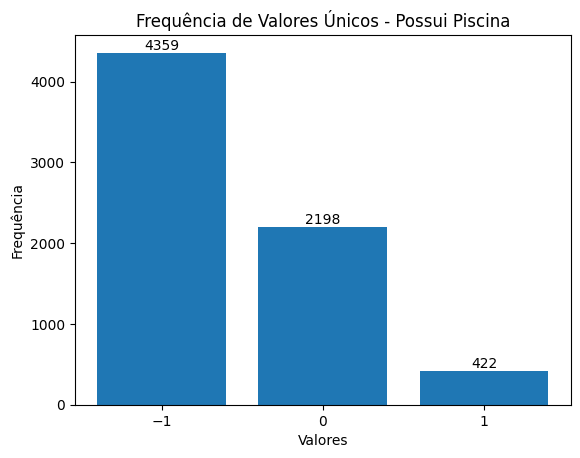

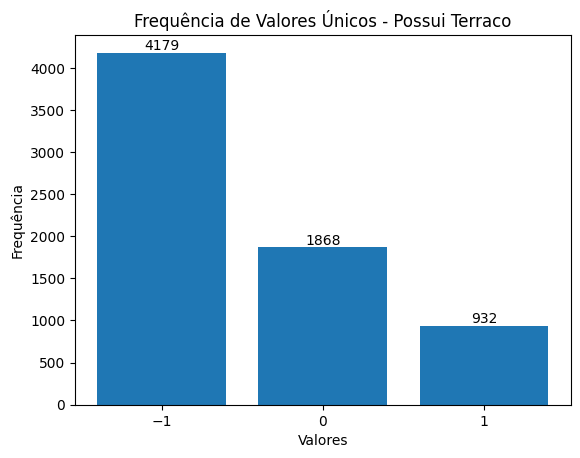

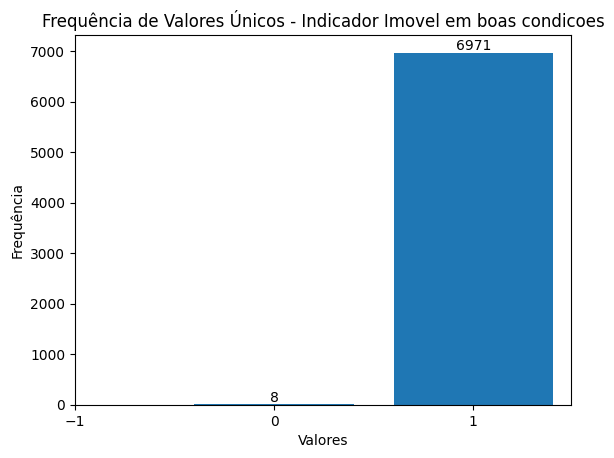

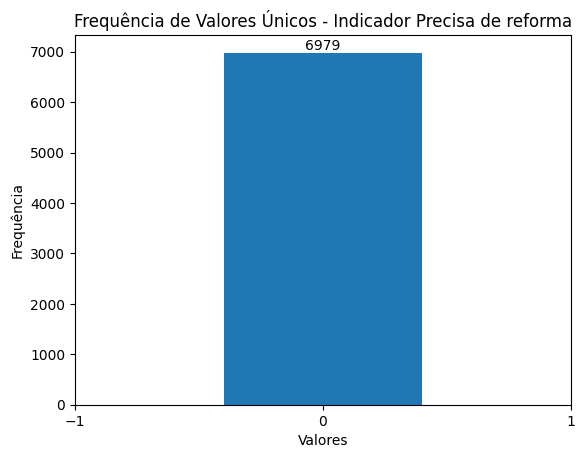

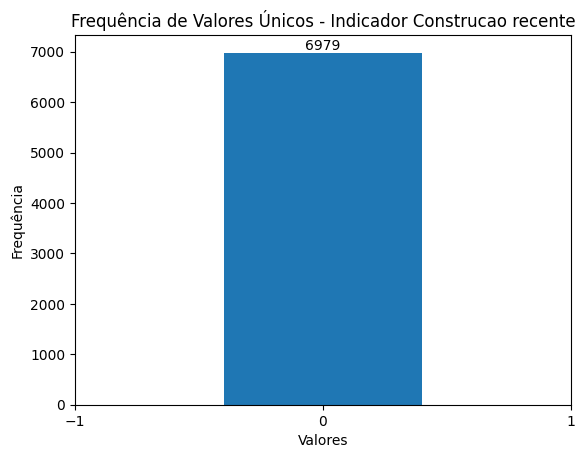

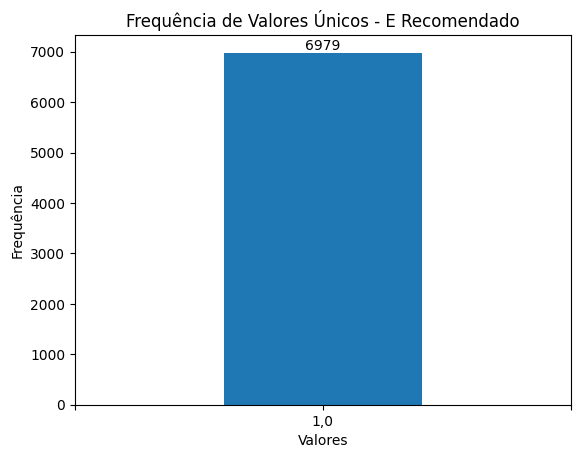

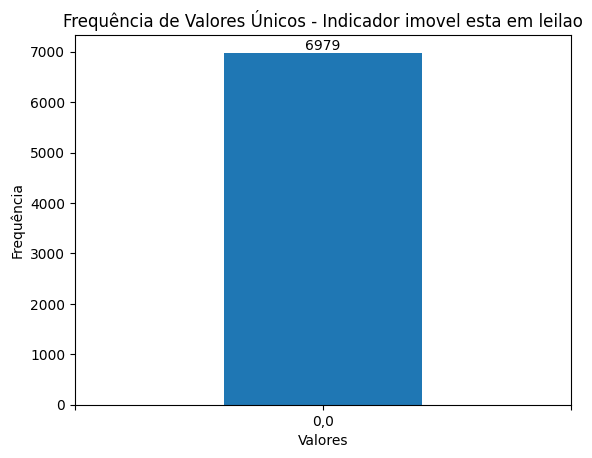

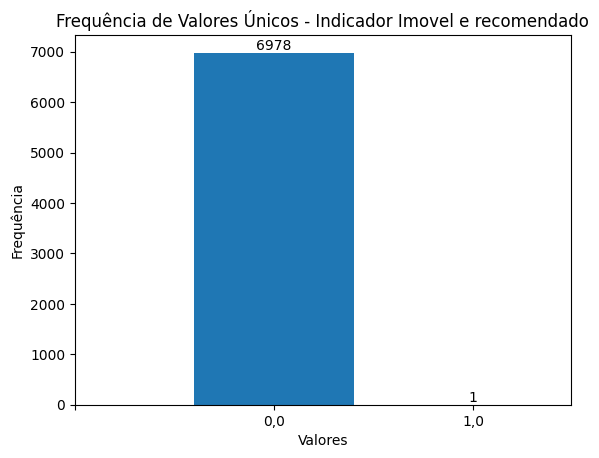

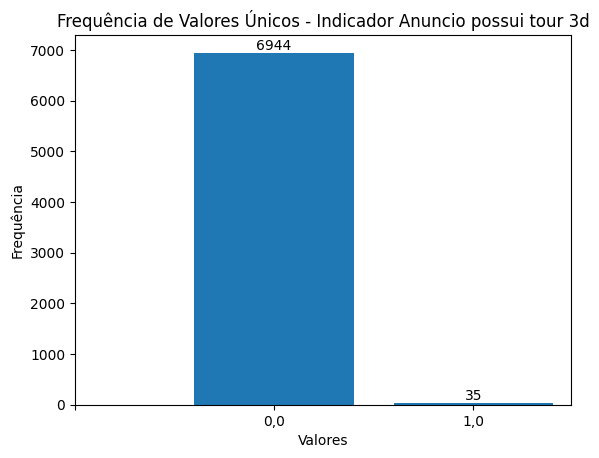

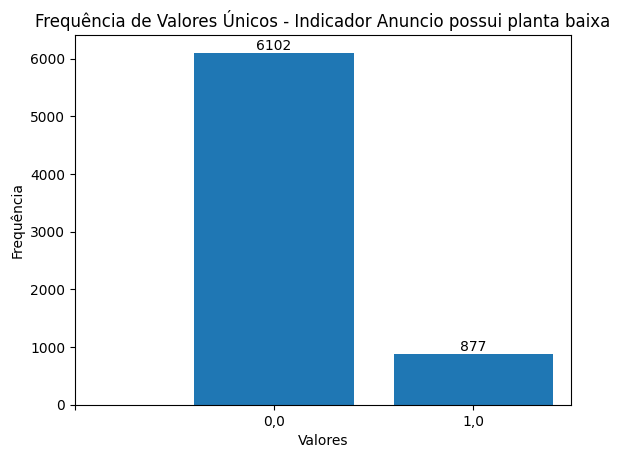

In [25]:
listaColunasBinarias =['Possui_Jardim', 'Possui_Elevador','Possui_Estacionamento', 'Possui_Piscina','Possui_Terraco',
                       'Indicador_Imovel_em_boas_condicoes','Indicador_Precisa_de_reforma', 'Indicador_Construcao_recente',
                       'E_Recomendado','Indicador_imovel_esta_em_leilao', 'Indicador_Imovel_e_recomendado',
                       'Indicador_Anuncio_possui_tour_3d','Indicador_Anuncio_possui_planta_baixa']

for variavelBinaria in listaColunasBinarias:
    plotar_frequencia_binaria(df_final,variavelBinaria)

In [26]:
column_list_to_drop = ['Indicador_Precisa_de_reforma','E_Recomendado','Indicador_imovel_esta_em_leilao',
                       'Indicador_Imovel_e_recomendado','Indicador_Imovel_em_boas_condicoes','Indicador_Construcao_recente',
                      'Indicador_Anuncio_possui_tour_3d']

# Exclui as colunas do dataframe
df_final = df_final.drop(columns=column_list_to_drop)

In [27]:
def exploratory_analysis(df, columns):
    for column in columns:
        if column in df.columns:
            data = df[column]
            print(f"{column}")
            statistics = data.describe().apply(lambda x: '{:.2f}'.format(x))
            print(statistics.to_string())
            plt.hist(data, bins=10, edgecolor='k')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.title(f'Histograma de {column}')
            plt.show()
            plt.boxplot(data)
            plt.ylabel(column)
            plt.title(f'Gráfico de Caixa (Boxplot) de {column}')
            plt.show()
        else:
            print(f"A coluna '{column}' não existe no DataFrame.")





Valor_Area_util_do_imovel
count    6979.00
mean       91.56
std        38.44
min        14.00
25%        62.00
50%        85.00
75%       116.00
max       205.00


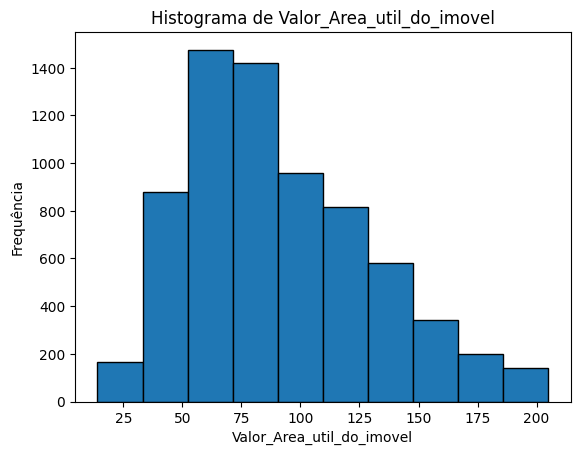

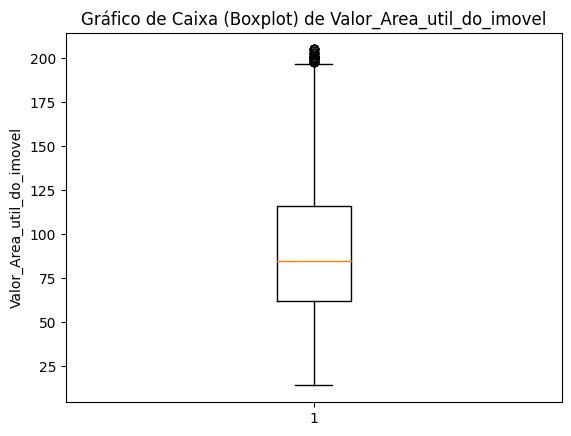

Numero_Andar_do_imovel
count    6979.00
mean        1.71
std         2.55
min        -1.00
25%         0.00
50%         1.00
75%         3.00
max        60.00


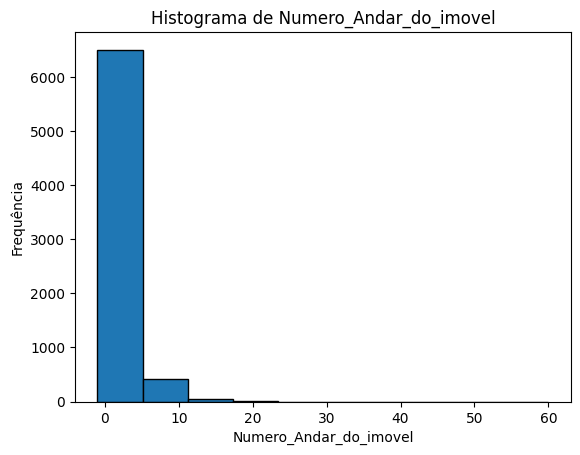

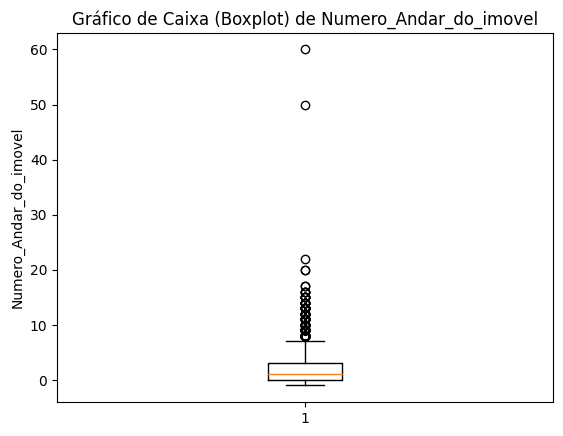

Quantidade_de_Quartos
count    6979.00
mean        1.95
std         1.03
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         6.00


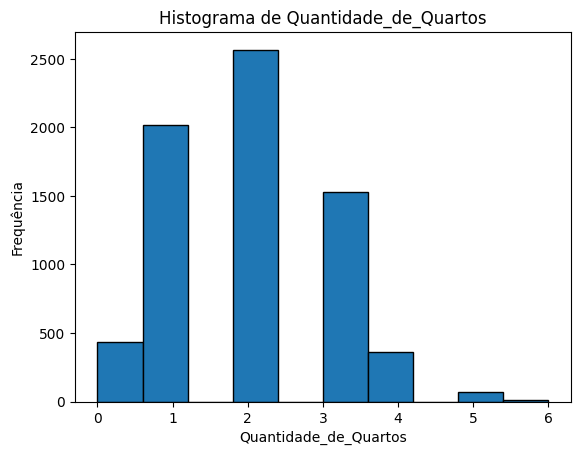

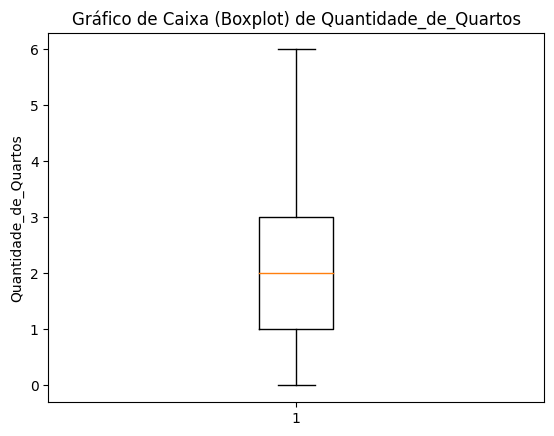

Numero_de_Banheiros
count    6979.00
mean        1.48
std         0.62
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         3.00


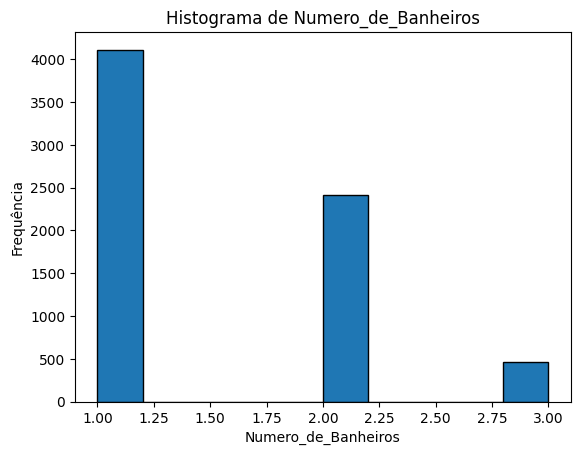

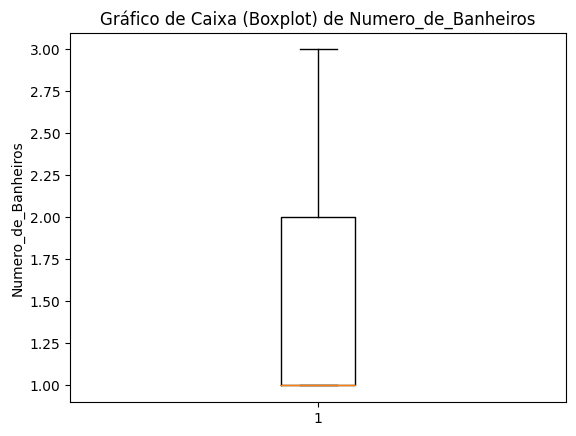

Area_construida
count    6979.00
mean       91.54
std        38.43
min        14.00
25%        62.00
50%        85.00
75%       116.00
max       205.00


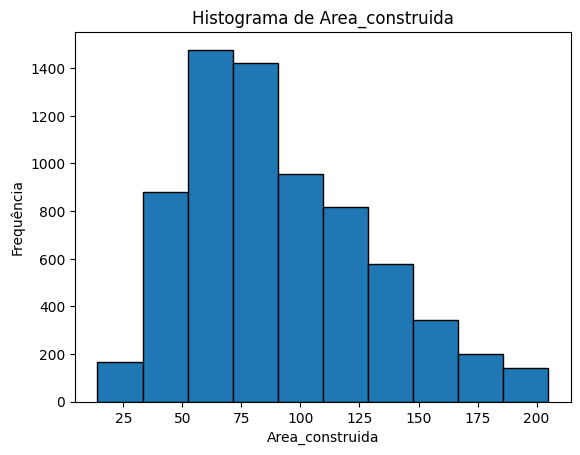

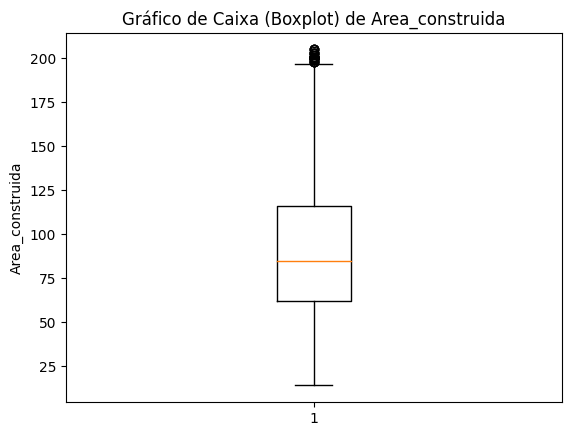

Numero_de_Quartos
count    6979.00
mean        1.94
std         1.03
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         6.00


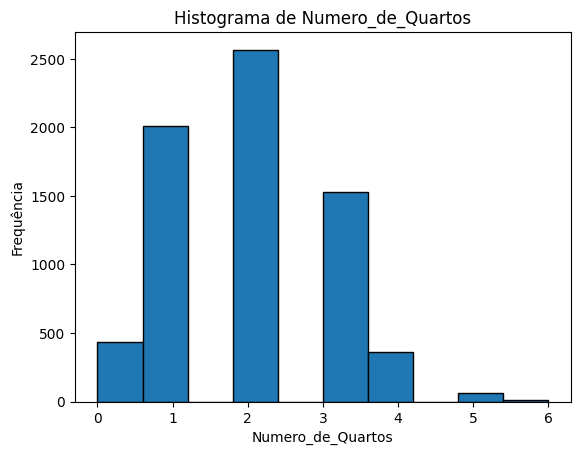

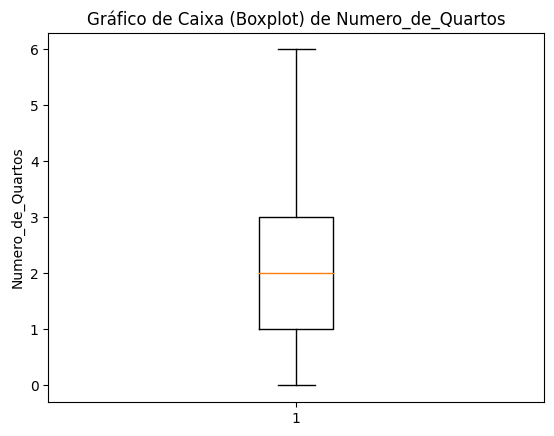

Numero_de_fotos_do_anuncio
count    6979.00
mean       16.82
std         9.52
min         0.00
25%        10.00
50%        16.00
75%        22.00
max        85.00


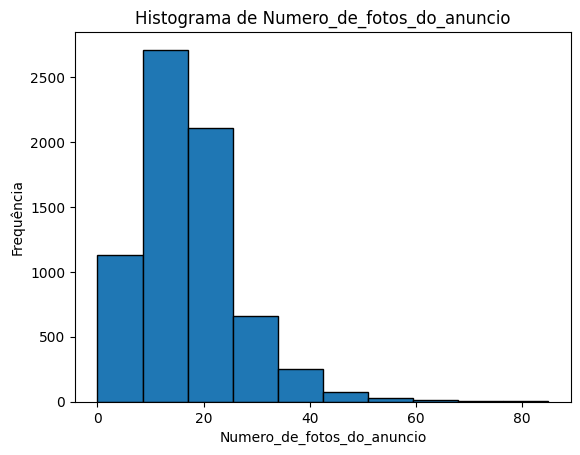

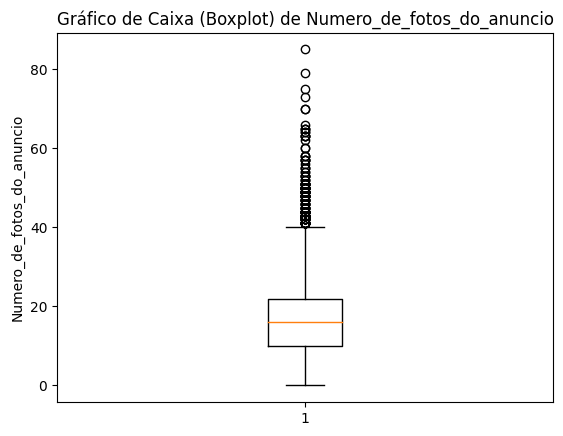

Numero_de_videos_do_anuncio
count    6979.00
mean        0.15
std         0.41
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         6.00


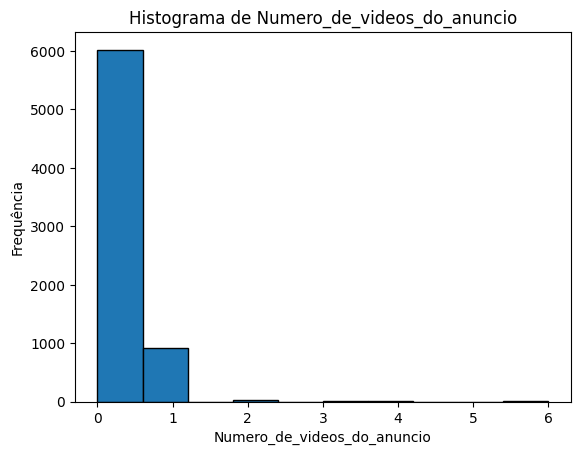

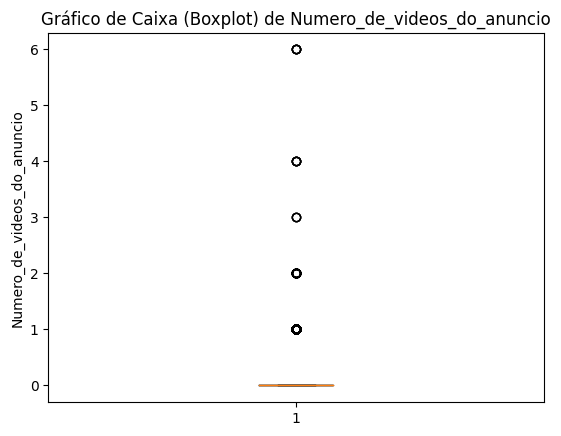

In [28]:
exploratory_analysis(df_final, lista_variaveis_numericas)


In [34]:
# Extraindo a coluna "Valor_area_util_do_imovel" em uma nova variável
valor_area_util = df_final['Valor_Area_util_do_imovel']

# Verificando as estatísticas descritivas básicas
print(valor_area_util.describe())

count    6719.000000
mean       96.353178
std        47.185427
min        15.000000
25%        65.000000
50%        87.000000
75%       120.000000
max       624.000000
Name: Valor_Area_util_do_imovel, dtype: float64


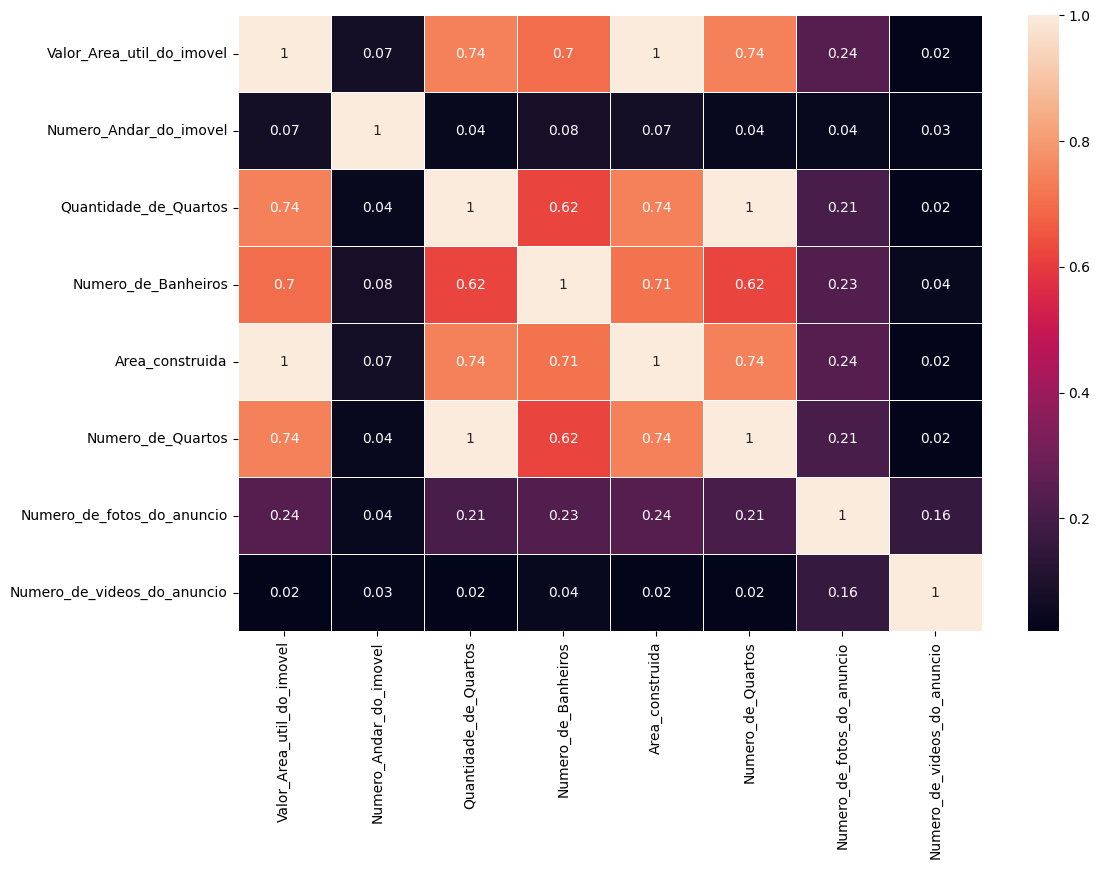

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a correlação linear
# df_numerico = df_final.select_dtypes(include=['int', 'float'])
df_numerico = df_final.filter(items=lista_variaveis_numericas)
correlation_matrix = df_numerico.corr()

plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, linewidths=.5);

# Identifique as correlações fortes (maiores que 0.9 ou menores que -0.9)
high_correlation = correlation_matrix[(correlation_matrix > 0.9) | (correlation_matrix < -0.9)]






In [49]:
# Exiba as variáveis com alta correlação
variables_with_high_correlation = high_correlation.stack().index.tolist()
print("Variáveis com alta correlação:")
for variables in variables_with_high_correlation:
    print(variables)


Variáveis com alta correlação:
('Valor_Area_util_do_imovel', 'Valor_Area_util_do_imovel')
('Valor_Area_util_do_imovel', 'Area_construida')
('Numero_Andar_do_imovel', 'Numero_Andar_do_imovel')
('Quantidade_de_Quartos', 'Quantidade_de_Quartos')
('Quantidade_de_Quartos', 'Numero_de_Quartos')
('Numero_de_Banheiros', 'Numero_de_Banheiros')
('Area_construida', 'Valor_Area_util_do_imovel')
('Area_construida', 'Area_construida')
('Numero_de_Quartos', 'Quantidade_de_Quartos')
('Numero_de_Quartos', 'Numero_de_Quartos')
('Numero_de_fotos_do_anuncio', 'Numero_de_fotos_do_anuncio')
('Numero_de_videos_do_anuncio', 'Numero_de_videos_do_anuncio')


In [37]:
#'Preco_por_metro_quadrado' e 'Preco' e 'Preco_do_Imovel'
# essa variaveis precisam ser avaliadas
# - Tipo_de_Preferencia_de_contato_com_o_proprietario poder ser excluida por não representar influencia sobre o preço do arrendamento
# - Tipo_de_Origem_do_anuncio também
# - verificar o tipo de operação
# - verificar o ad_topology
df_final[['Tipo_de_Operacao','Tipo_de_Origem_do_anuncio','Tipo_de_Preferencia_de_contato_com_o_proprietario','ad_typology']]


,Tipo_de_Operacao,Tipo_de_Origem_do_anuncio,Tipo_de_Preferencia_de_contato_com_o_proprietario,ad_typology
0,"2,0","1,0","3,0","1,0"
1,"2,0","1,0","3,0","1,0"
2,"2,0","1,0","1,0","1,0"
3,"2,0","1,0","1,0","2,0"
4,"2,0","1,0","1,0","1,0"
...,...,...,...,...
7273,"2,0","4,0","1,0","1,0"
7274,"2,0","4,0","1,0","2,0"
7275,"2,0","11,0","1,0","2,0"
7276,"2,0","12,0","1,0","1,0"


In [51]:
!pip install folium
!pip install geopandas

                                              0.0/1.1 MB ? eta -:--:--
     -----                                    0.1/1.1 MB 2.9 MB/s eta 0:00:01
     ------------------------------           0.8/1.1 MB 8.9 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 8.7 MB/s eta 0:00:00
                                              0.0/22.7 MB ? eta -:--:--
     --                                       1.2/22.7 MB 25.2 MB/s eta 0:00:01
     ----                                     2.5/22.7 MB 32.3 MB/s eta 0:00:01
     -------                                  4.2/22.7 MB 33.3 MB/s eta 0:00:01
     ----------                               5.7/22.7 MB 33.4 MB/s eta 0:00:01
     -------------                            7.4/22.7 MB 33.8 MB/s eta 0:00:01
     ---------------                          9.0/22.7 MB 34.1 MB/s eta 0:00:01
     ------------------                      10.7/22.7 MB 32.8 MB/s eta 0:00:01
     ---------------------                   12.4/22.7 MB 36.4 

In [46]:
df_final['Latitude_imovel'] = df_final['Latitude_imovel'].str.replace(',', '.').astype(float)
df_final['Longitude_imovel'] = df_final['Longitude_imovel'].str.replace(',', '.').astype(float)
df_final['Preco_do_Imovel'] = df_final['Preco_do_Imovel'].str.replace(',', '.').astype(float)
df_final['Preco'] = df_final['Preco'].str.replace(',', '.').astype(float)

In [49]:
import folium
from folium.plugins import HeatMap


# Crie um mapa centrado na média da latitude e longitude
mapa = folium.Map(location=[df_final['Latitude_imovel'].mean(), df_final['Longitude_imovel'].mean()], zoom_start=10)

# Crie uma lista de pontos de dados, onde cada ponto é uma lista: [latitude, longitude, valor_metro_quadrado]
data = df_final[['Latitude_imovel', 'Longitude_imovel', 'Preco_do_Imovel']].values.tolist()

# Crie o mapa de calor e adicione ao mapa
HeatMap(data).add_to(mapa)

# Exibe o mapa
mapa


<Axes: >

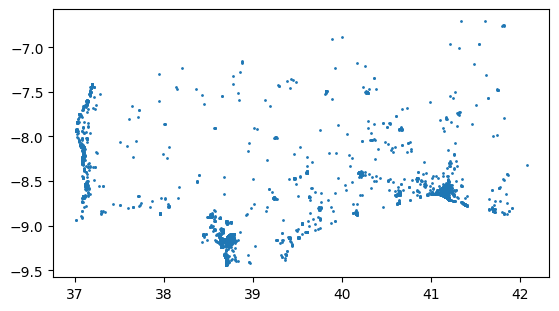

In [53]:
import geopandas as gpd
from shapely.geometry import Point

# Crie uma nova coluna 'geometry' que contém objetos Point criados a partir das colunas de latitude e longitude
df_final['geometry'] = df_final.apply(lambda row: Point(row['Latitude_imovel'], row['Longitude_imovel']), axis=1)

# Crie um GeoDataFrame a partir do DataFrame
gdf = gpd.GeoDataFrame(df_final, geometry='geometry')

# Plotar o GeoDataFrame
gdf.plot(markersize=1)
